In [16]:
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = glob.glob("41025h*.txt")

files


['41025h2014.txt',
 '41025h2015.txt',
 '41025h2016.txt',
 '41025h2017.txt',
 '41025h2018.txt',
 '41025h2019.txt']

In [5]:
na_vals = [99, 999, 9999, 99999]

def read_ndbc_stdmet(path):
    # 1) Read the header line that starts with #YY
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        header = None
        for line in f:
            if line.startswith("#YY"):
                header = line.lstrip("#").strip().split()
                break
    if header is None:
        raise ValueError(f"Couldn't find #YY header in {path}")

    # 2) Read the data, skipping comment lines, and apply the header we extracted
    df = pd.read_csv(
        path,
        sep=r"\s+",
        comment="#",
        header=None,
        names=header,
        na_values=na_vals,
        engine="python",
    )
    return df

files = sorted(glob.glob("41025h*.txt"))  # adjust if your files end with .txt

dfs = [read_ndbc_stdmet(f) for f in files]
wave_data = pd.concat(dfs, ignore_index=True)

print(wave_data.shape)
print(wave_data.columns.tolist())
wave_data.head()


(117882, 18)
['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']


,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2013,12,31,23,50,305.0,7.0,10.0,0.96,5.56,4.41,2.0,1025.5,11.8,23.3,1.8,NaN,NaN
1,2014,1,1,0,50,301.0,6.8,9.5,0.96,6.25,4.40,360.0,1026.6,11.8,23.3,1.4,NaN,NaN
2,2014,1,1,1,50,305.0,7.5,9.5,0.89,5.88,4.23,2.0,1027.6,11.9,23.3,0.5,NaN,NaN
3,2014,1,1,2,50,308.0,6.6,9.4,0.89,5.88,4.15,3.0,1027.9,11.7,23.3,-0.1,NaN,NaN
4,2014,1,1,3,50,322.0,7.0,10.1,0.92,6.25,4.38,26.0,1027.9,12.0,23.2,-0.3,NaN,NaN


In [7]:
wave_data["datetime"] = pd.to_datetime(
    wave_data.rename(columns={"YY":"year","MM":"month","DD":"day","hh":"hour","mm":"minute"})[
        ["year","month","day","hour","minute"]
    ],
    errors="coerce"
)

wave_data = wave_data.dropna(subset=["datetime"]).set_index("datetime").sort_index()


In [8]:
wave_data

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,,,,,,
2013-12-31 23:50:00,2013,12,31,23,50,305.0,7.0,10.0,0.96,5.56,4.41,2.0,1025.5,11.8,23.3,1.8,NaN,NaN
2014-01-01 00:50:00,2014,1,1,0,50,301.0,6.8,9.5,0.96,6.25,4.40,360.0,1026.6,11.8,23.3,1.4,NaN,NaN
2014-01-01 01:50:00,2014,1,1,1,50,305.0,7.5,9.5,0.89,5.88,4.23,2.0,1027.6,11.9,23.3,0.5,NaN,NaN
2014-01-01 02:50:00,2014,1,1,2,50,308.0,6.6,9.4,0.89,5.88,4.15,3.0,1027.9,11.7,23.3,-0.1,NaN,NaN
2014-01-01 03:50:00,2014,1,1,3,50,322.0,7.0,10.1,0.92,6.25,4.38,26.0,1027.9,12.0,23.2,-0.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:10:00,2019,12,31,23,10,266.0,8.3,10.7,NaN,NaN,NaN,NaN,1008.9,15.5,23.1,7.0,NaN,NaN
2019-12-31 23:20:00,2019,12,31,23,20,263.0,8.9,11.2,NaN,NaN,NaN,NaN,1009.0,15.5,23.1,7.0,NaN,NaN
2019-12-31 23:30:00,2019,12,31,23,30,271.0,8.6,11.5,NaN,NaN,NaN,NaN,1009.2,15.7,22.9,7.6,NaN,NaN


In [10]:
features = [
    "WDIR", "WSPD", "GST",
    "APD", "MWD", "PRES",
    "ATMP", "WTMP"
]

targets = ["WVHT", "APD"]

X = wave_data[features]
y = wave_data[targets]


In [11]:
train = wave_data.loc["2014-01-01":"2018-12-31"]
test  = wave_data.loc["2019-01-01":"2019-12-31"]

In [13]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train[features])
X_test  = scaler_X.transform(test[features])

y_train = scaler_y.fit_transform(train[targets])
y_test  = scaler_y.transform(test[targets])


In [14]:
corr_vars = [
    "WDIR", "WSPD", "GST",
    "DPD", "APD", "MWD",
    "PRES", "ATMP", "WTMP",
    "DEWP", "WVHT"
]

corr_data = wave_data[corr_vars].copy()


In [15]:
corr_matrix = corr_data.corr()

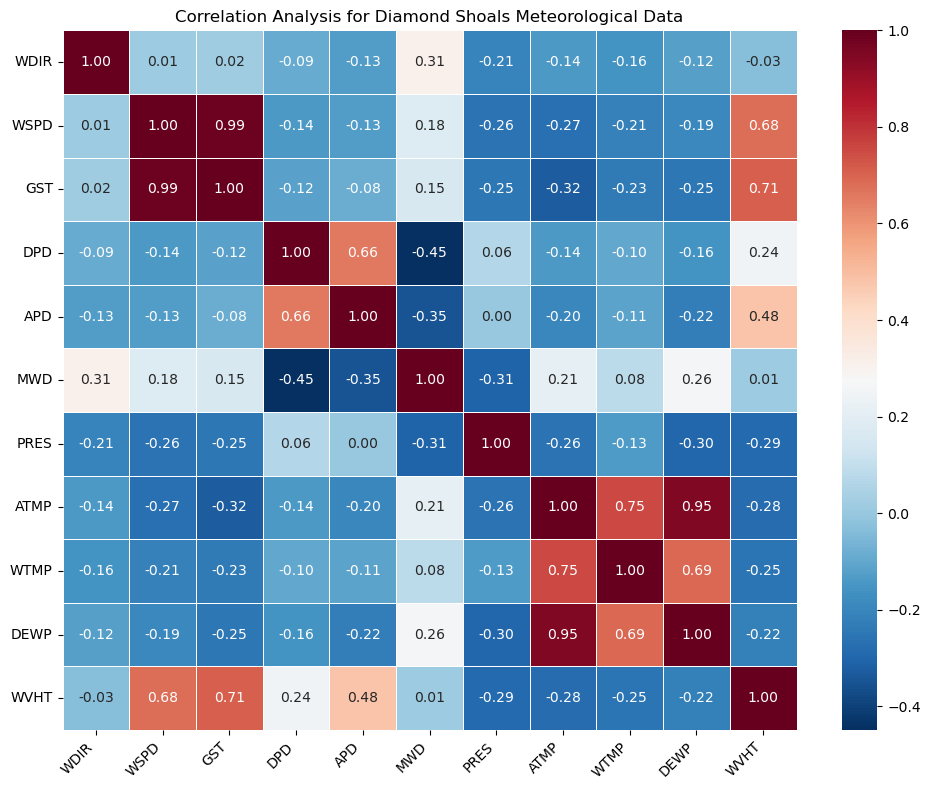

In [17]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    cmap="RdBu_r",       
    annot=True,       
    fmt=".2f",
    linewidths=0.5,
    cbar=True
)

plt.title("Correlation Analysis for Diamond Shoals Meteorological Data", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
